In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(rc={'figure.figsize':(9,6)})


In [3]:

events_data = pd.read_csv(r"C:/Users/ADMIN/Downloads/event_data_train.zip")
submissions_data = pd.read_csv(r"C:/Users/ADMIN/Downloads/submissions_data_train.zip")

In [4]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [5]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [112]:
submissions_data['date']=pd.to_datetime(submissions_data.timestamp,unit='s')
submissions_data['day']=submissions_data.date.dt.date

In [113]:
events_data['date']=pd.to_datetime(events_data.timestamp,unit='s')

In [114]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,31981,1472827464,viewed,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473086664
1,31981,1472827464,discovered,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473086664
2,32815,1514383364,discovered,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564
3,32815,1514383364,viewed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564
4,32815,1514383364,passed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564


In [115]:
events_data.dtypes

step_id                                  int64
timestamp                                int64
action                                  object
user_id                                  int64
date                            datetime64[ns]
day                                     object
user_time                               object
user_learning_time_threshold            object
dtype: object

In [116]:
events_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [117]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [118]:
events_data['day']=events_data.date.dt.date


In [119]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,31981,1472827464,viewed,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473086664
1,31981,1472827464,discovered,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473086664
2,32815,1514383364,discovered,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564
3,32815,1514383364,viewed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564
4,32815,1514383364,passed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564


In [120]:
events_data.groupby('day').user_id.nunique()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
             ... 
2018-05-15    145
2018-05-16    155
2018-05-17    165
2018-05-18    126
2018-05-19    131
Name: user_id, Length: 1070, dtype: int64

<Axes: xlabel='day'>

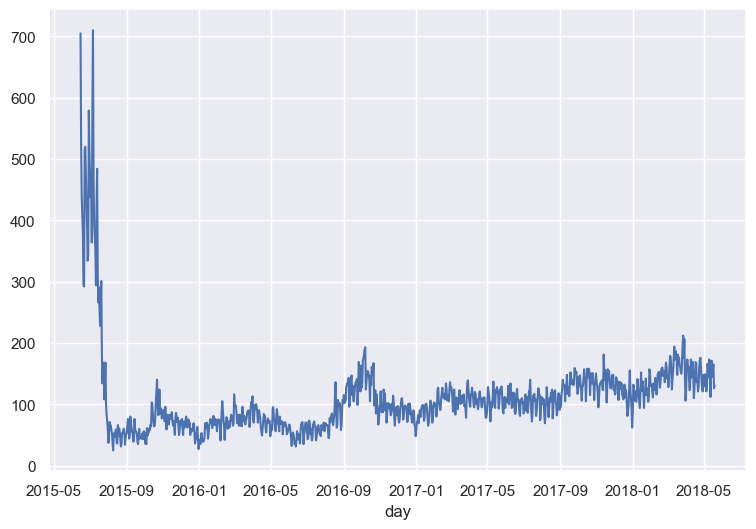

In [121]:
events_data.groupby('day').user_id.nunique().plot()

In [16]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [17]:
events_data[events_data.action=='passed'].groupby('user_id',as_index=False).head()

,step_id,timestamp,action,user_id,date,day
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15
12,32814,1434340950,passed,17632,2015-06-15 04:02:30,2015-06-15
16,32812,1434341039,passed,17632,2015-06-15 04:03:59,2015-06-15
...,...,...,...,...,...,...
3480339,32811,1526762701,passed,943,2018-05-19 20:45:01,2018-05-19
3480352,32929,1526762781,passed,943,2018-05-19 20:46:21,2018-05-19
3480355,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19
3480671,32950,1526770439,passed,26659,2018-05-19 22:53:59,2018-05-19


In [18]:
events_data[events_data.action=='passed']

,step_id,timestamp,action,user_id,date,day
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
5,32811,1434340895,passed,17632,2015-06-15 04:01:35,2015-06-15
9,32929,1434340944,passed,17632,2015-06-15 04:02:24,2015-06-15
12,32814,1434340950,passed,17632,2015-06-15 04:02:30,2015-06-15
16,32812,1434341039,passed,17632,2015-06-15 04:03:59,2015-06-15
...,...,...,...,...,...,...
3480679,32179,1526771246,passed,19410,2018-05-19 23:07:26,2018-05-19
3480680,32182,1526771250,passed,19410,2018-05-19 23:07:30,2018-05-19
3480692,33373,1526772469,passed,11677,2018-05-19 23:27:49,2018-05-19
3480696,33375,1526772685,passed,11677,2018-05-19 23:31:25,2018-05-19


In [19]:
events_data[events_data.action=='passed'].groupby('user_id',as_index=False).agg({'step_id':'count'}).rename(columns={'step_id':'passed_steps'}).head(100)

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84
...,...,...
95,149,198
96,151,1
97,152,11
98,154,5


<Axes: >

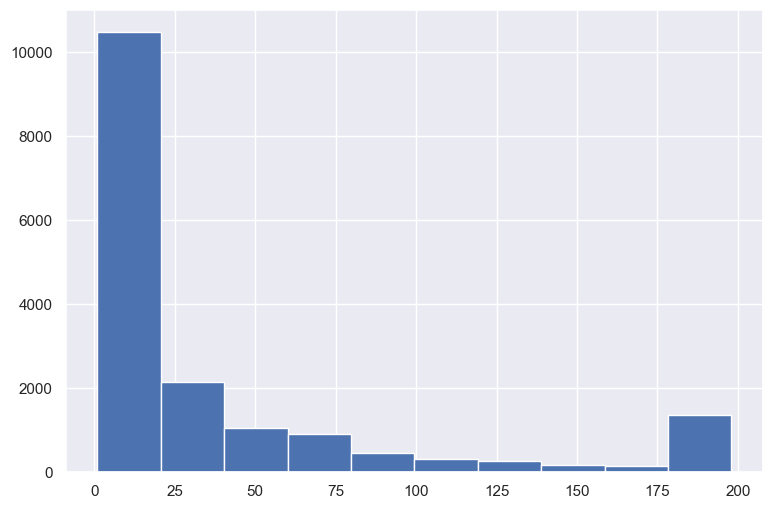

In [20]:
events_data[events_data.action=='passed'].groupby('user_id',as_index=False).agg({'step_id':'count'}).rename(columns={'step_id':'passed_steps'})\
.passed_steps.hist()

In [21]:
events_data[events_data.action=='passed'].groupby('user_id',as_index=False).agg({'step_id':'count'}).rename(columns={'step_id':'passed_steps'})\
.passed_steps.min()

np.int64(1)

In [22]:
events_data.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',fill_value=0).head()

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1


In [23]:
events_data.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',fill_value=0).reset_index().head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


<Axes: >

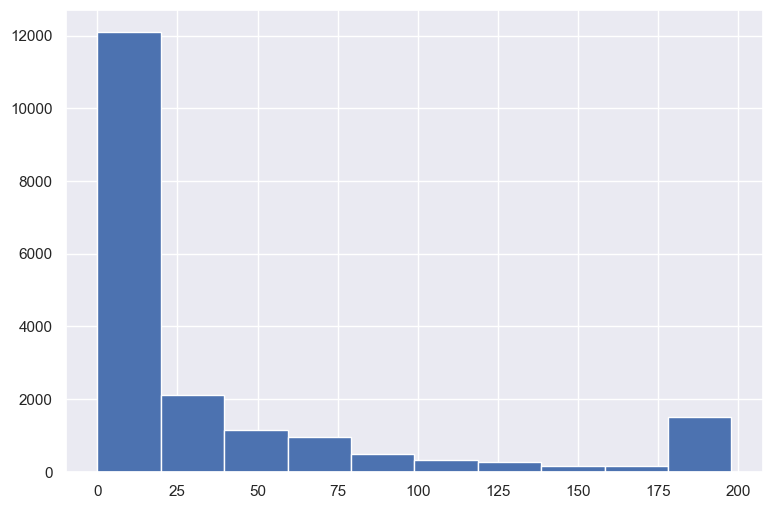

In [24]:
events_data.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',fill_value=0).reset_index().discovered\
.hist()

In [25]:
submissions_data = pd.read_csv(r"C:/Users/ADMIN/Downloads/submissions_data_train.zip")

In [26]:
submissions_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [27]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [28]:
users_scores=submissions_data.pivot_table(index='user_id',columns='submission_status',values='step_id',aggfunc='count',fill_value=0).reset_index()

In [29]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [30]:
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day']).head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [31]:
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
.groupby('user_id')['timestamp'].apply(list).head()

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [32]:
events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
.groupby('user_id')['timestamp'].apply(list)\
.apply(np.diff)

user_id
1                                                       []
2                                                [4843602]
3         [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                               [33702812]
7                                                       []
                               ...                        
26790                           [238225, 893964, 64879648]
26793                                                   []
26794    [86128, 136759, 94899, 1422583, 14347289, 5050...
26797                                            [1567990]
26798                                                   []
Name: timestamp, Length: 19234, dtype: object

In [33]:
gap_data=events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
.groupby('user_id')['timestamp'].apply(list)\
.apply(np.diff).values

In [34]:
gap_data

array([array([], dtype=int64), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int64)], dtype=object)

In [35]:
np.concatenate(gap_data,axis=0)

array([4843602, 6899249,  182484, ...,   98252,   57019, 1567990])

In [36]:
gap_data=pd.Series(np.concatenate(gap_data,axis=0))

In [37]:
gap_data

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int64

In [38]:
gap_data=gap_data/(24*60*60)

In [39]:
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

<Axes: >

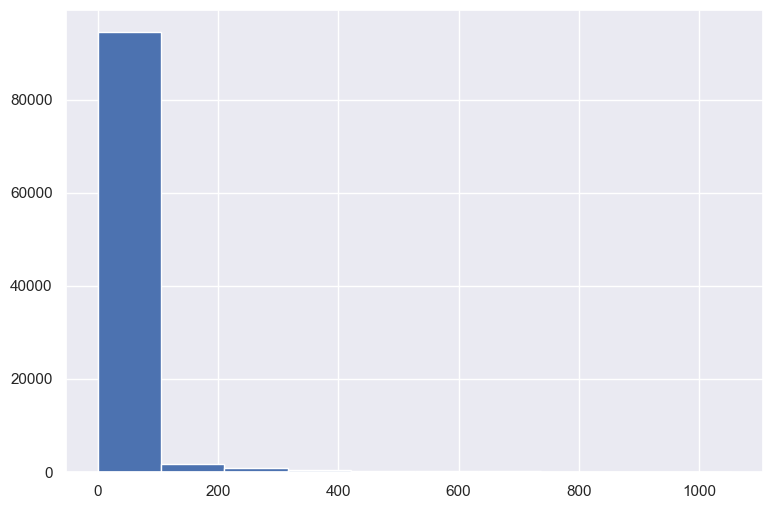

In [40]:
gap_data.hist()

<Axes: >

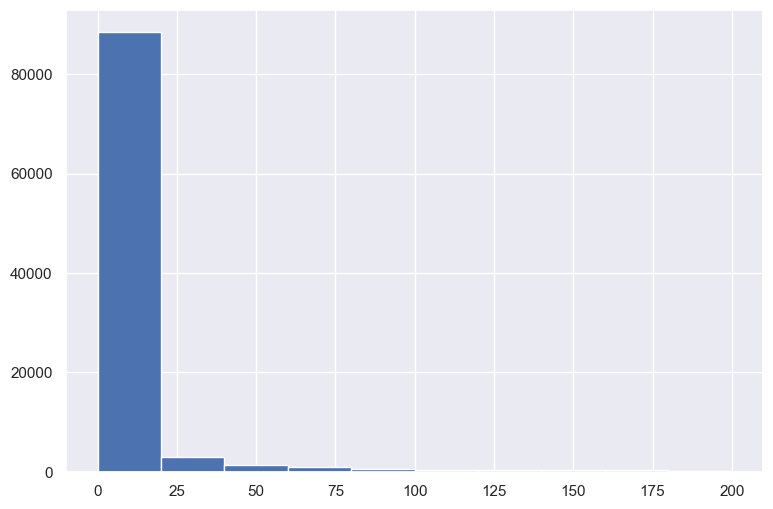

In [41]:
gap_data[gap_data<200].hist()

In [42]:
gap_data.quantile(0.95)

np.float64(59.760440972222156)

In [43]:
events_data.groupby('user_id')['day'].nunique().idxmax()

np.int64(1046)

In [44]:
submissions_data.query('submission_status == "correct"')\
                                .groupby('user_id', as_index = False)\
                                .agg({'submission_status': 'count'})\
                                .rename(columns = {'submission_status' : 'count_submissions'})\
                               .sort_values('count_submissions', ascending = False).reset_index().head(1)

,index,user_id,count_submissions
0,433,1046,421


In [45]:
max_correct_attempts = users_scores['correct'].max()
users_scores[users_scores.correct == max_correct_attempts]

submission_status,user_id,correct,wrong
439,1046,421,513


In [46]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [47]:
events_data.groupby('user_id',as_index=False).agg({'timestamp':'max'})

,user_id,timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
...,...,...
19229,26790,1517495987
19230,26793,1510225034
19231,26794,1512035039
19232,26797,1509995096


In [48]:
users_data=events_data.groupby('user_id',as_index=False).agg({'timestamp':'max'}).rename(columns={'timestamp':'last_timestamp'})

In [49]:
users_data['is_gone_user']=1526772811-users_data.last_timestamp

In [50]:
users_data

,user_id,last_timestamp,is_gone_user
0,1,1472827464,53945347
1,2,1519226966,7545845
2,3,1444581588,82191223
3,5,1499859939,26912872
4,7,1521634660,5138151
...,...,...,...
19229,26790,1517495987,9276824
19230,26793,1510225034,16547777
19231,26794,1512035039,14737772
19232,26797,1509995096,16777715


In [51]:
now =1526772811

In [52]:
drop_out_threshold=2592000

In [53]:
users_data['is_gone_user']=now-users_data.last_timestamp>drop_out_threshold

In [54]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [55]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [56]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [57]:
users_data=users_data.merge(users_scores,on='user_id',how='outer')

In [58]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,NaN,NaN
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [59]:
users_data=users_data.fillna(0)

In [60]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [61]:
users_events_data=events_data.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',fill_value=0).reset_index()

In [62]:
users_events_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


In [63]:
users_data=users_data.merge(users_events_data,how='outer')

In [64]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [65]:
users_days=events_data.groupby('user_id').day.nunique()

In [66]:
users_days.head()

user_id
1    1
2    2
3    7
5    2
7    1
Name: day, dtype: int64

In [67]:
users_days=users_days.to_frame().reset_index()

In [68]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [69]:
users_data=users_data.merge(users_days,how='outer')

In [70]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [71]:
users_data.user_id.nunique()

19234

In [72]:
events_data.user_id.nunique()

19234

In [73]:
users_data['passed_corse']=users_data.passed>170

In [74]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False


In [75]:
users_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_corse,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [76]:
100*1425/17809

8.001572238755685

In [77]:
users_data[users_data.passed_corse].day.median()

np.float64(20.0)

<Axes: >

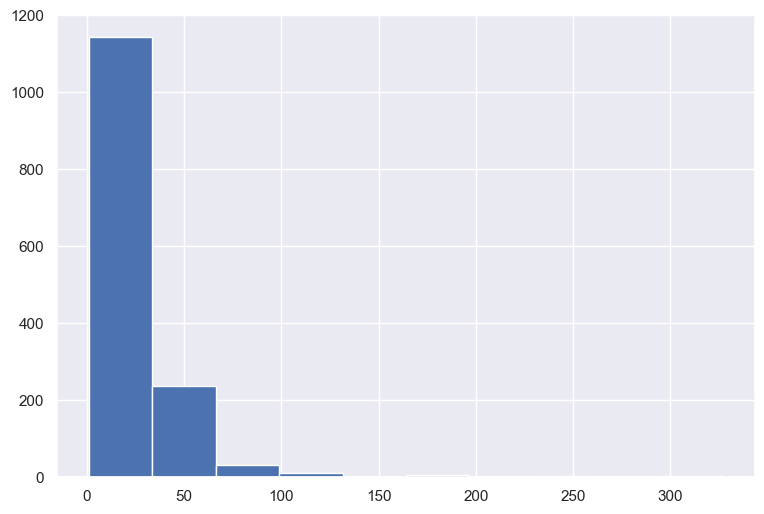

In [78]:
users_data[users_data.passed_corse].day.hist()

In [79]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [80]:
user_min_time=events_data.groupby('user_id',as_index=False).agg({'timestamp':'min'}).rename({'timestamp':'min_timestamp'},axis=1)

In [81]:
user_min_time

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
...,...,...
19229,26790,1451484016
19230,26793,1510225031
19231,26794,1495287049
19232,26797,1508425316


In [82]:
users_data=users_data.merge(user_min_time, how='outer')

In [83]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_corse,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660
...,...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4,False,1451484016
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1,False,1510225031
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False,1495287049
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2,False,1508425316


In [84]:
event_data_train=pd.DataFrame()

In [85]:
events_data['user_time'] = events_data.user_id.map(str)+'_'+events_data.timestamp.map(str)

In [86]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [87]:
learning_time_threshold=3*24*60*60

In [88]:
user_learning_time_threshold=user_min_time.user_id.map(str)+'_'+(user_min_time.min_timestamp+learning_time_threshold).map(str)

In [89]:
user_learning_time_threshold

0            1_1473086664
1            2_1514642564
2            3_1434617676
3            5_1466416009
4            7_1521893860
               ...       
19229    26790_1451743216
19230    26793_1510484231
19231    26794_1495546249
19232    26797_1508684516
19233    26798_1521234963
Length: 19234, dtype: object

In [90]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold


In [91]:
events_data

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
...,...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19,11677_1526772685
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19,5198_1526772750


In [92]:
events_data=events_data.merge(user_min_time[['user_id','user_learning_time_threshold']],how='outer')

In [93]:
events_data.shape

(3480703, 8)

In [94]:
events_data_train=events_data[events_data.user_time<=events_data.user_learning_time_threshold]

In [95]:
events_data_train

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,31981,1472827464,viewed,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473086664
1,31981,1472827464,discovered,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473086664
2,32815,1514383364,discovered,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564
3,32815,1514383364,viewed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564
4,32815,1514383364,passed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564
...,...,...,...,...,...,...,...,...
3480698,31956,1520978499,passed,26798,2018-03-13 22:01:39,2018-03-13,26798_1520978499,26798_1521234963
3480699,31956,1520978499,viewed,26798,2018-03-13 22:01:39,2018-03-13,26798_1520978499,26798_1521234963
3480700,31955,1520978742,passed,26798,2018-03-13 22:05:42,2018-03-13,26798_1520978742,26798_1521234963
3480701,31955,1520978742,discovered,26798,2018-03-13 22:05:42,2018-03-13,26798_1520978742,26798_1521234963


In [96]:
events_data_train.user_id

0              1
1              1
2              2
3              2
4              2
           ...  
3480698    26798
3480699    26798
3480700    26798
3480701    26798
3480702    26798
Name: user_id, Length: 1014985, dtype: int64

In [97]:
events_data_train.groupby('user_id').day.nunique()

user_id
1        1
2        1
3        1
5        1
7        1
        ..
26790    2
26793    1
26794    3
26797    1
26798    1
Name: day, Length: 19234, dtype: int64

In [102]:
events_data_train.groupby('user_id').day.nunique().max()

np.int64(4)

In [126]:
sub_d = submissions_data.merge(user_min_time, how="outer")

submissions_data_train = sub_d[sub_d.timestamp <= sub_d.min_timestamp + learning_time_threshold]

In [165]:
submissions_data_train

,step_id,timestamp,submission_status,user_id,date,day,user_learning_time_threshold,min_timestamp
1,32812.0,1.514383e+09,correct,2,2017-12-27 14:04:45,2017-12-27,2_1514642564,1514383364
2,32929.0,1.514383e+09,correct,2,2017-12-27 14:03:40,2017-12-27,2_1514642564,1514383364
6,31977.0,1.434359e+09,wrong,3,2015-06-15 09:10:32,2015-06-15,3_1434617676,1434358476
7,31977.0,1.434360e+09,wrong,3,2015-06-15 09:12:00,2015-06-15,3_1434617676,1434358476
8,31977.0,1.434360e+09,wrong,3,2015-06-15 09:12:21,2015-06-15,3_1434617676,1434358476
...,...,...,...,...,...,...,...,...
518393,32812.0,1.508426e+09,correct,26797,2017-10-19 15:10:28,2017-10-19,26797_1508684516,1508425316
518394,32929.0,1.508425e+09,correct,26797,2017-10-19 15:02:47,2017-10-19,26797_1508684516,1508425316
518395,32812.0,1.520978e+09,wrong,26798,2018-03-13 21:54:23,2018-03-13,26798_1521234963,1520975763
518396,32812.0,1.520978e+09,correct,26798,2018-03-13 21:54:30,2018-03-13,26798_1521234963,1520975763


In [166]:
submissions_data_train.groupby('user_id')

In [198]:
submissions_data_train.groupby('user_id').day.nunique().max()

np.int64(4)

In [199]:
X=submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index()

In [200]:
X

,user_id,day
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3
...,...,...
8908,26787,1
8909,26790,1
8910,26794,3
8911,26797,1


In [201]:
steps_tried=submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index().rename(columns={'step_id':'steps_tried'})

In [202]:
steps_tried

,user_id,steps_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,23
...,...,...
8908,26787,3
8909,26790,1
8910,26794,27
8911,26797,2


In [203]:
X=X.merge(steps_tried,on='user_id',how='outer')

In [204]:
X

,user_id,day,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23
...,...,...,...
8908,26787,1,3
8909,26790,1,1
8910,26794,3,27
8911,26797,1,2


In [205]:
X=submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index().rename(columns={'day':'days'})

In [206]:
X

,user_id,days
0,2,1
1,3,1
2,8,1
3,14,1
4,16,3
...,...,...
8908,26787,1
8909,26790,1
8910,26794,3
8911,26797,1


In [207]:
X=X.merge(steps_tried,on='user_id',how='outer')

In [208]:
X

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23
...,...,...,...
8908,26787,1,3
8909,26790,1,1
8910,26794,3,27
8911,26797,1,2


In [209]:
submissions_data_train.pivot_table(index='user_id',columns='submission_status',values='step_id',aggfunc='count',fill_value=0).reset_index().head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,4,4
2,8,9,21
3,14,0,1
4,16,23,27


In [210]:
X=X.merge(submissions_data_train.pivot_table(index='user_id',columns='submission_status',values='step_id',aggfunc='count',fill_value=0).reset_index())

In [211]:
X.head()

,user_id,days,steps_tried,correct,wrong
0,2,1,2,2,0
1,3,1,4,4,4
2,8,1,11,9,21
3,14,1,1,0,1
4,16,3,23,23,27


In [212]:
X['correct_ratio']=X.correct/(X.correct+X.wrong)

In [213]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.00
1,3,1,4,4,4,0.50
2,8,1,11,9,21,0.30
3,14,1,1,0,1,0.00
4,16,3,23,23,27,0.46


In [214]:
X=X.merge(events_data_train.pivot_table(index='user_id',columns='action',values='step_id',aggfunc='count',fill_value=0).reset_index()[['user_id','viewed']],how='outer')

In [215]:
X.fillna(0)

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,1,0.0,0.0,0.0,0.0,0.000000,1
1,2,1.0,2.0,2.0,0.0,1.000000,9
2,3,1.0,4.0,4.0,4.0,0.500000,20
3,5,0.0,0.0,0.0,0.0,0.000000,1
4,7,0.0,0.0,0.0,0.0,0.000000,1
...,...,...,...,...,...,...,...
19229,26790,1.0,1.0,1.0,0.0,1.000000,6
19230,26793,0.0,0.0,0.0,0.0,0.000000,1
19231,26794,3.0,27.0,31.0,9.0,0.775000,134
19232,26797,1.0,2.0,2.0,0.0,1.000000,10


In [216]:
X = X.fillna(0)

In [217]:
X=X.merge(users_data[['user_id','passed_corse','is_gone_user']],how='outer')

In [218]:
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_corse,is_gone_user
0,1,0.0,0.0,0.0,0.0,0.000000,1,False,True
1,2,1.0,2.0,2.0,0.0,1.000000,9,False,True
2,3,1.0,4.0,4.0,4.0,0.500000,20,False,True
3,5,0.0,0.0,0.0,0.0,0.000000,1,False,True
4,7,0.0,0.0,0.0,0.0,0.000000,1,False,True
...,...,...,...,...,...,...,...,...,...
19229,26790,1.0,1.0,1.0,0.0,1.000000,6,False,True
19230,26793,0.0,0.0,0.0,0.0,0.000000,1,False,True
19231,26794,3.0,27.0,31.0,9.0,0.775000,134,False,True
19232,26797,1.0,2.0,2.0,0.0,1.000000,10,False,True


In [219]:
X=X[~((X.is_gone_user==False) & (X.passed_corse==False))]

In [220]:
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_corse,is_gone_user
0,1,0.0,0.0,0.0,0.0,0.000000,1,False,True
1,2,1.0,2.0,2.0,0.0,1.000000,9,False,True
2,3,1.0,4.0,4.0,4.0,0.500000,20,False,True
3,5,0.0,0.0,0.0,0.0,0.000000,1,False,True
4,7,0.0,0.0,0.0,0.0,0.000000,1,False,True
...,...,...,...,...,...,...,...,...,...
19229,26790,1.0,1.0,1.0,0.0,1.000000,6,False,True
19230,26793,0.0,0.0,0.0,0.0,0.000000,1,False,True
19231,26794,3.0,27.0,31.0,9.0,0.775000,134,False,True
19232,26797,1.0,2.0,2.0,0.0,1.000000,10,False,True


In [221]:
y = X.passed_corse.map(int)

In [222]:
X =X.drop(['passed_corse','is_gone_user'],axis=1)

In [223]:
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
0,1,0.0,0.0,0.0,0.0,0.000000,1
1,2,1.0,2.0,2.0,0.0,1.000000,9
2,3,1.0,4.0,4.0,4.0,0.500000,20
3,5,0.0,0.0,0.0,0.0,0.000000,1
4,7,0.0,0.0,0.0,0.0,0.000000,1
...,...,...,...,...,...,...,...
19229,26790,1.0,1.0,1.0,0.0,1.000000,6
19230,26793,0.0,0.0,0.0,0.0,0.000000,1
19231,26794,3.0,27.0,31.0,9.0,0.775000,134
19232,26797,1.0,2.0,2.0,0.0,1.000000,10


In [224]:
X=X.set_index(X.user_id)

In [225]:
X

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,,
1,1,0.0,0.0,0.0,0.0,0.000000,1
2,2,1.0,2.0,2.0,0.0,1.000000,9
3,3,1.0,4.0,4.0,4.0,0.500000,20
5,5,0.0,0.0,0.0,0.0,0.000000,1
7,7,0.0,0.0,0.0,0.0,0.000000,1
...,...,...,...,...,...,...,...
26790,26790,1.0,1.0,1.0,0.0,1.000000,6
26793,26793,0.0,0.0,0.0,0.0,0.000000,1
26794,26794,3.0,27.0,31.0,9.0,0.775000,134


In [226]:
X =X.drop('user_id',axis=1)

In [227]:
X

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
1,0.0,0.0,0.0,0.0,0.000000,1
2,1.0,2.0,2.0,0.0,1.000000,9
3,1.0,4.0,4.0,4.0,0.500000,20
5,0.0,0.0,0.0,0.0,0.000000,1
7,0.0,0.0,0.0,0.0,0.000000,1
...,...,...,...,...,...,...
26790,1.0,1.0,1.0,0.0,1.000000,6
26793,0.0,0.0,0.0,0.0,0.000000,1
26794,3.0,27.0,31.0,9.0,0.775000,134


In [250]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import tree

In [251]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [252]:
clf = tree.DecisionTreeClassifier()

In [253]:
parameters = {'criterion': ['gini', 'entropy'],
             'max_depth': range(1, 30)
              }

In [254]:
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)

In [255]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [256]:
best_clf = grid_search_cv_clf.best_estimator_

In [264]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [266]:
from sklearn.tree import plot_tree

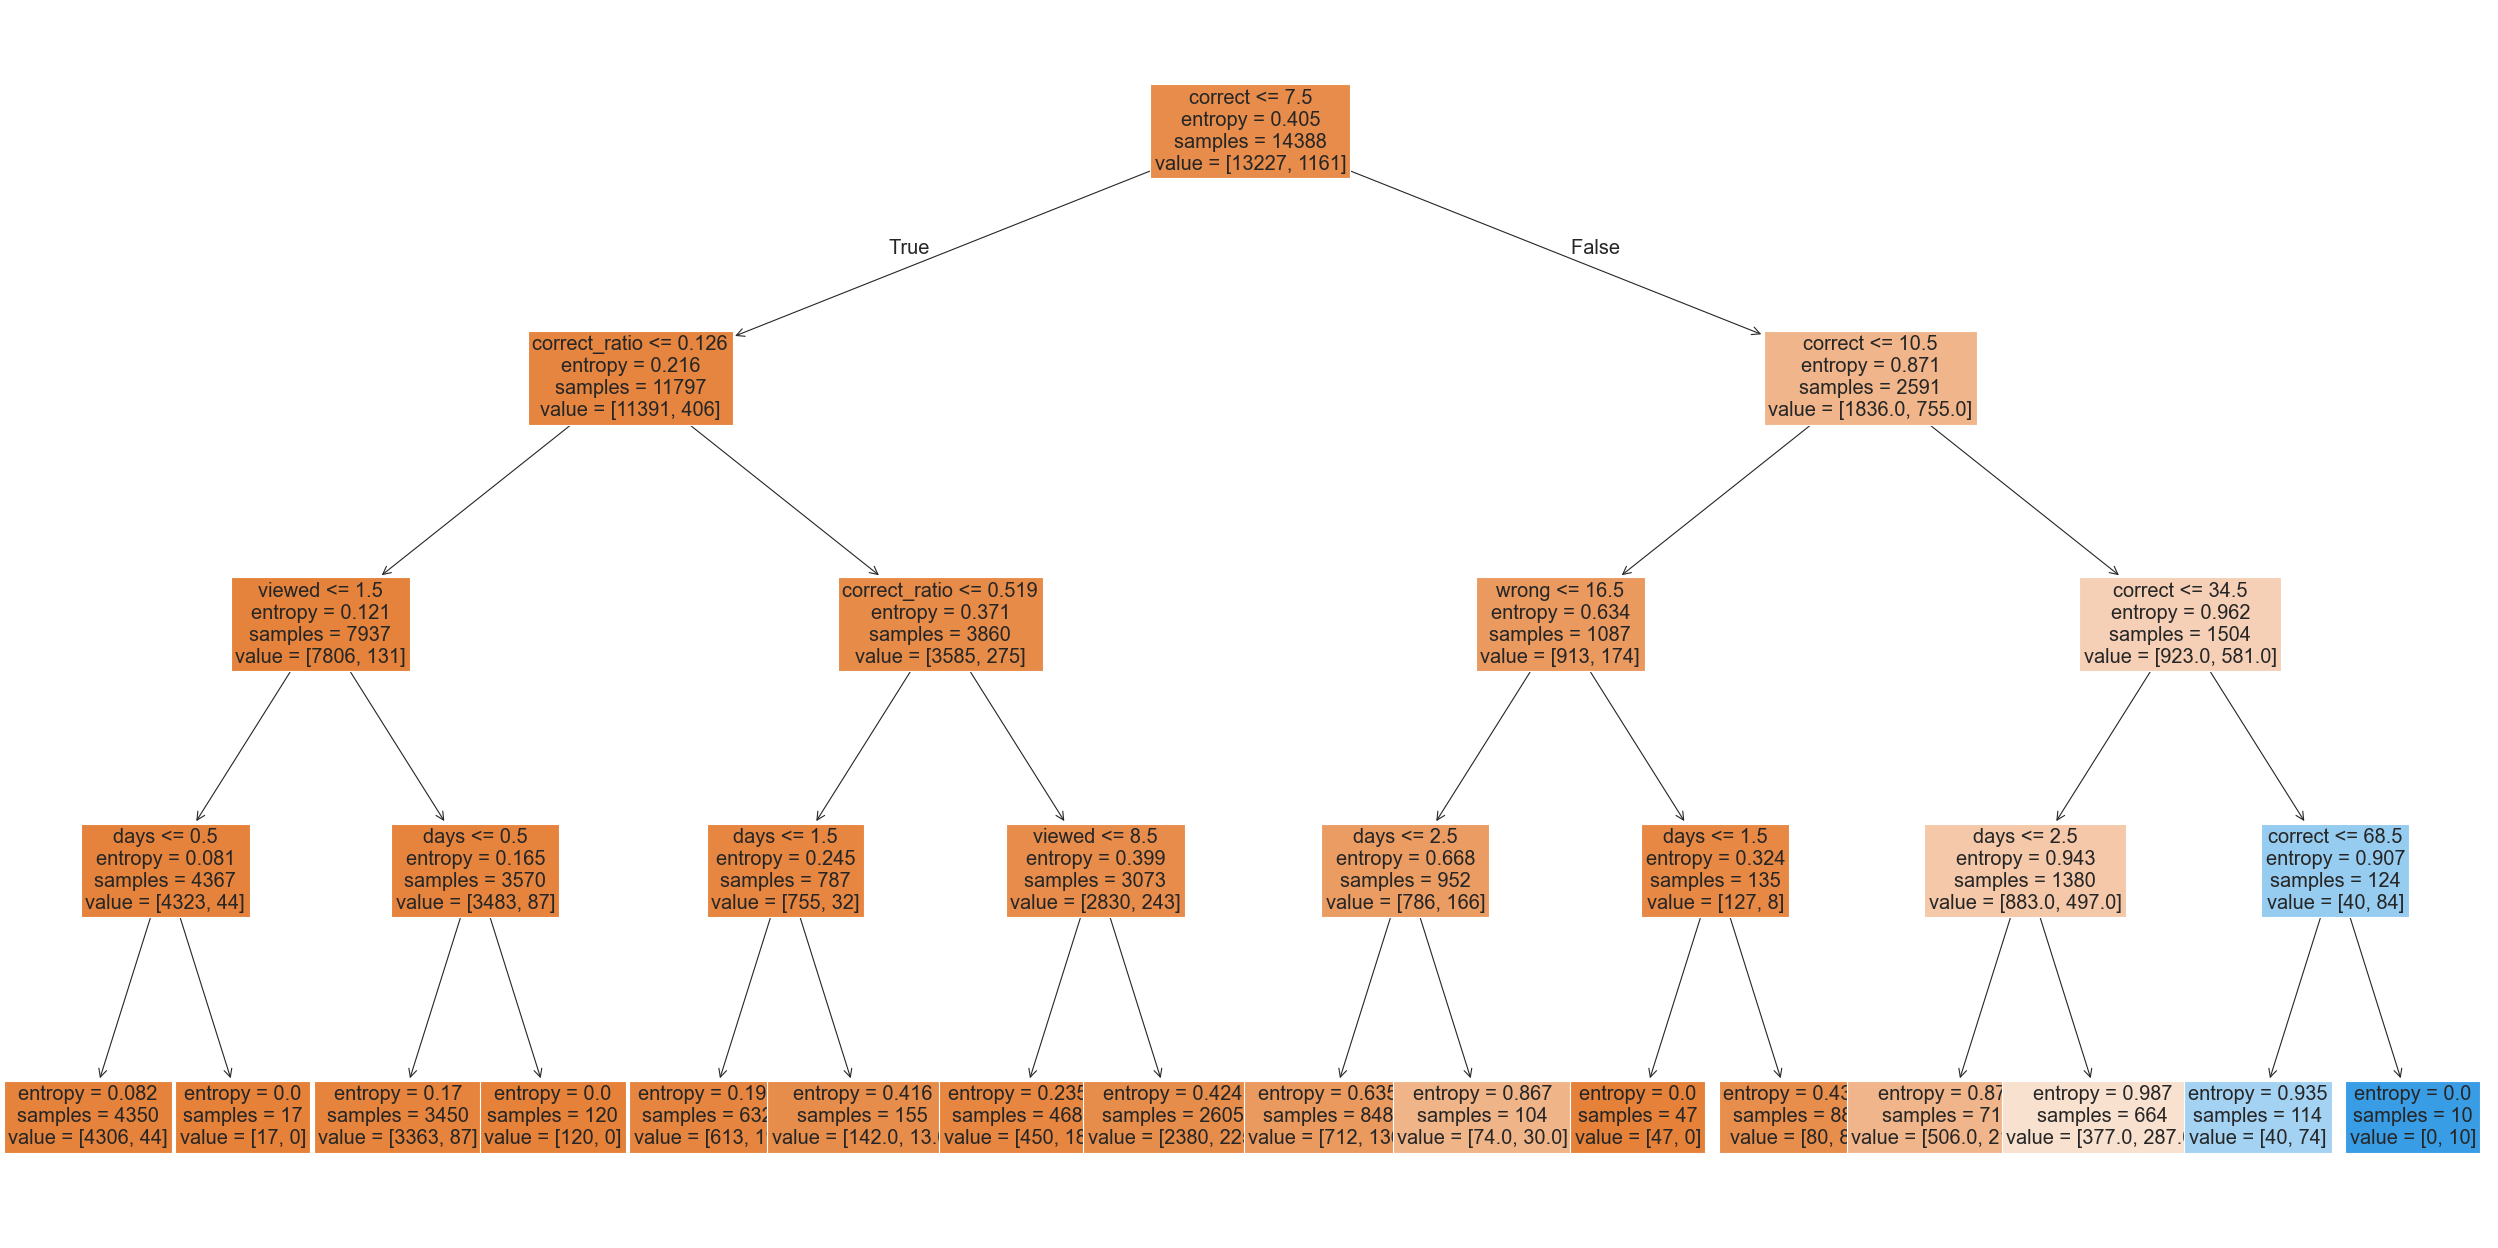

In [270]:
plt.figure(figsize=(40, 20),dpi=80)
p = tree.plot_tree(best_clf, fontsize=18,filled=True,feature_names=list(X))

In [272]:
best_clf.score(X_test,y_test)

0.9293855991103698

In [273]:
from sklearn.metrics import precision_score

In [274]:
y_pred=best_clf.predict(X_test)

In [275]:
precision_score(y_test, y_pred)

np.float64(0.6388888888888888)

In [276]:
from sklearn.metrics import recall_score

In [277]:
recall_score(y_test, y_pred)

np.float64(0.08712121212121213)

In [278]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [279]:
y_predicted_prob[:,1]

array([0.29329609, 0.29329609, 0.08637236, ..., 0.03006329, 0.01011494,
       0.08387097])

<Axes: >

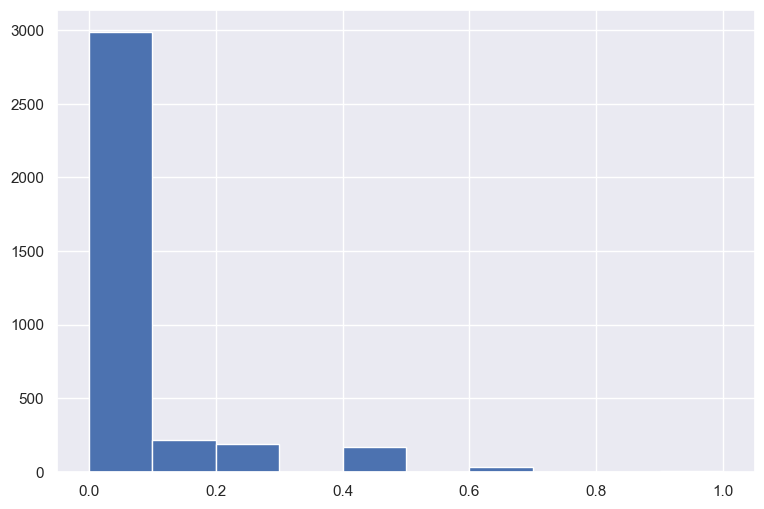

In [280]:
pd.Series(y_predicted_prob[:,1]).hist()

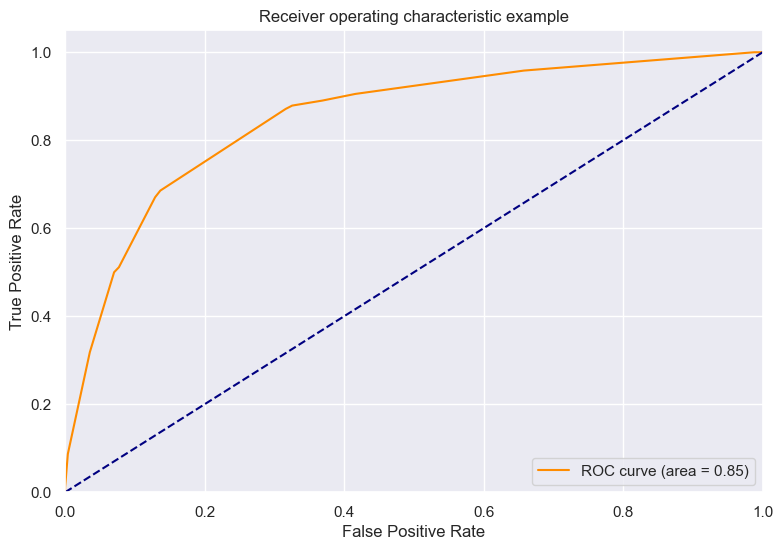

In [294]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.Figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

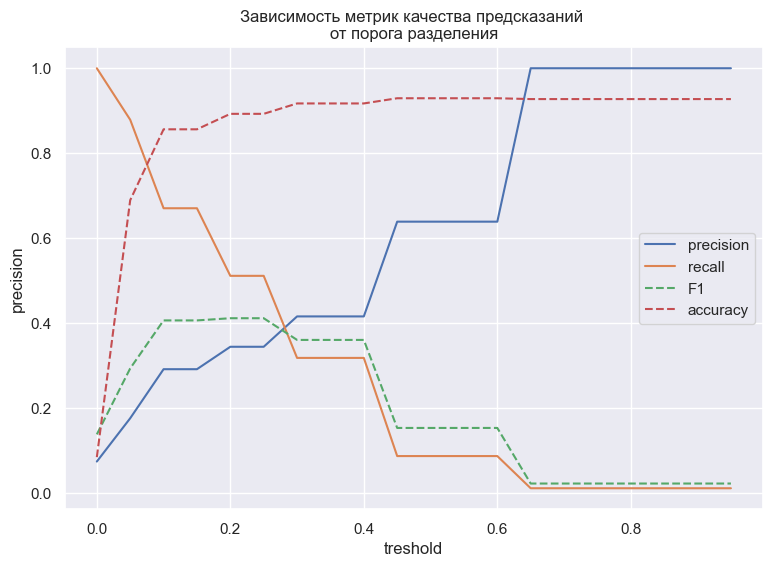

In [295]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def get_scores(tr):
  y_pred = np.where(y_predicted_prob[:,1]>tr, 1, 0)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  return precision, recall, f1, accuracy

lst_precision, lst_recall, lst_f1, lst_accuracy = [], [], [], []
for tr in np.arange(0,1,0.05):
    precision, recall, f1, accuracy = get_scores(tr)
    lst_precision.append(precision) 
    lst_recall.append(recall)
    lst_f1.append(f1)
    lst_accuracy.append(accuracy)

monitor = pd.DataFrame({'treshold':np.arange(0,1,0.05), 'precision':lst_precision,'recall':lst_recall, 'f1':lst_f1, 'accuracy':lst_accuracy})

sns.lineplot(data=monitor, x='treshold', y='precision', label='precision')
sns.lineplot(data=monitor, x='treshold', y='recall', label='recall')
sns.lineplot(data=monitor, x='treshold', y='f1', label='F1', linestyle='--')
sns.lineplot(data=monitor, x='treshold', y='accuracy', label='accuracy', linestyle='--')
plt.title('Зависимость метрик качества предсказаний \nот порога разделения')
plt.show()